In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torch import nn

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [2]:
from text_recognizer.datasets import IamLinesDataset, AddTokens

In [49]:
transform = [{"type": "ToTensor", "args": None}, 
             {"type": "ApplyContrast", "args": {"low": 0.0, "high": 0.2}},
             {"type": "RandomAffine", "args": {"degrees": [-1.2, 1.2], "scale": [0.9, 1.0]}}
            ]

In [50]:
dataset = IamLinesDataset(train=False, pad_token="_", transform=transform)
dataset.load_or_generate_data()
print(dataset)

IAM Lines Dataset
Number classes: 80
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}
Data: (1861, 28, 952)
Targets: (1861, 97)



In [51]:
dataset.input_shape

(28, 952)

In [52]:
dataset.output_shape

(97, 80)

In [53]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join([dataset.mapper(int(i)) for i in y])

convert_y_label_to_string(dataset.targets[0])

'He rose from his breakfast-nook bench____________________________________________________________'

drawing-in great breaths that____________________________________________________________________
became great sighs of ecstacy.___________________________________________________________________
"They have come!" he said reverently, gripping his_______________________________________________
hands together between his knees and leaning_____________________________________________________
forward. "Isn't it a glorious thing! Long awaited________________________________________________
transcendent event, the exalted desire of all____________________________________________________
mankind through all ages! The Kingdom of the_____________________________________________________
Mind is at hand!" He turned beaming eyes_________________________________________________________
upward and shook his head slowly from____________________________________________________________
A superfluous precaution for there was no other car______________________________________________


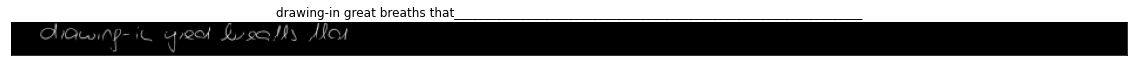

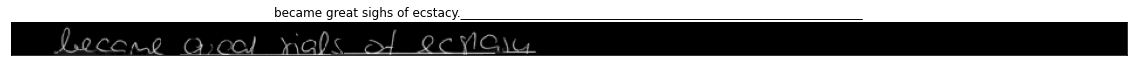

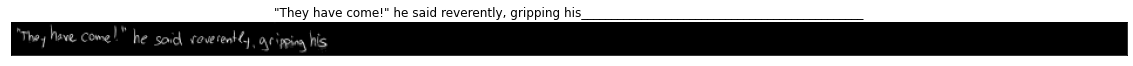

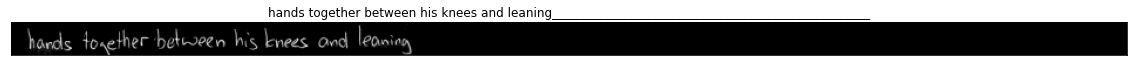

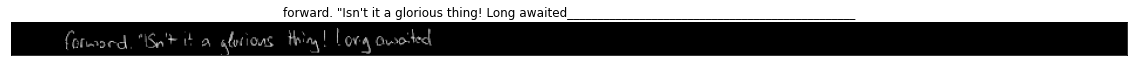

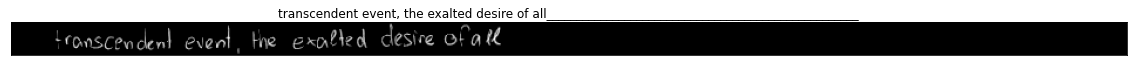

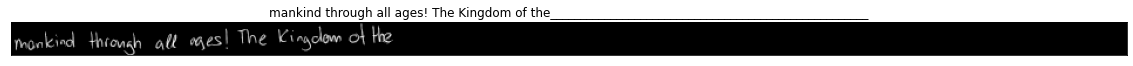

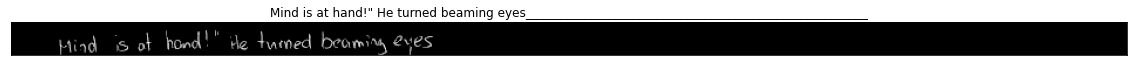

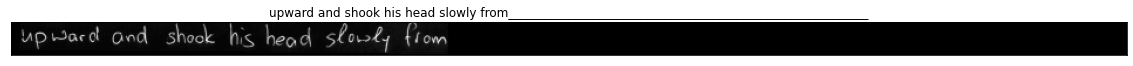

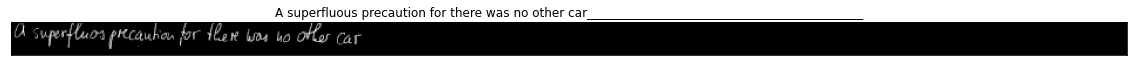

In [56]:
for i in range(10, 20):
    plt.figure(figsize=(20, 20))
    plt.xticks([])
    plt.yticks([])
    data, target = dataset[i]
    sentence = convert_y_label_to_string(target, dataset) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(data.squeeze(0).numpy(), cmap='gray')

In [55]:
data, target = dataset[12]
sentence = convert_y_label_to_string(target) 

In [9]:
target.shape

torch.Size([97])

In [10]:
h, w, s = 28, 5, 5

In [11]:
from einops.layers.torch import Rearrange
slide = nn.Sequential(nn.Unfold(kernel_size=(h, w), stride=(1, s)), Rearrange("b (c h w) t -> b t c h w", h=h, w=w, c=1))

In [12]:
28 * 5

140

In [13]:
patches = slide(data.unsqueeze(0))

"They have come!" he said reverently, gripping his_______________________________________________


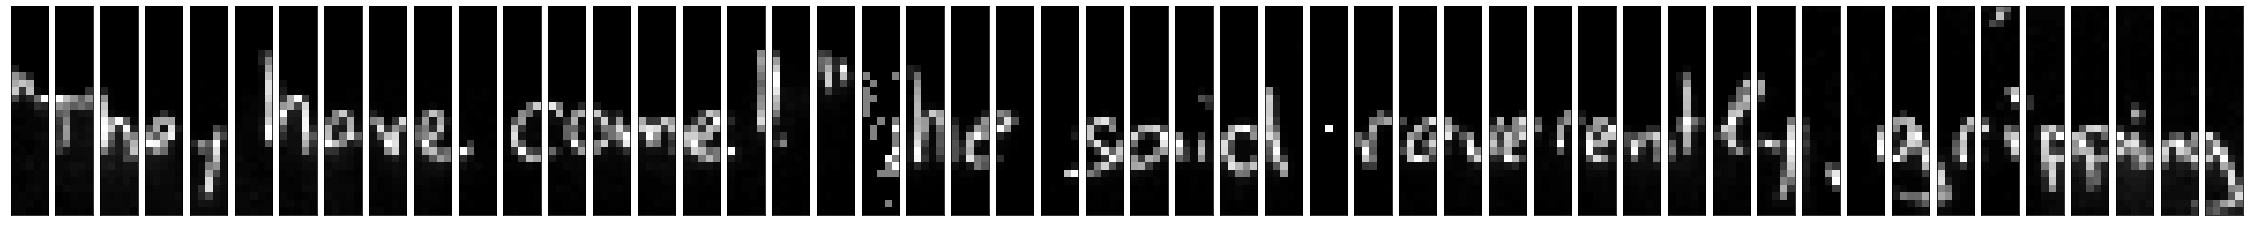

In [14]:
# remove batch size
n = 50
patches = patches.squeeze(0)
fig = plt.figure(figsize=(40, 40))
print(sentence)
for i in range(n):
    ax = fig.add_subplot(1, n, i + 1)
    ax.imshow(patches[i].squeeze(0), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

In [15]:
patches.shape

torch.Size([190, 1, 28, 5])

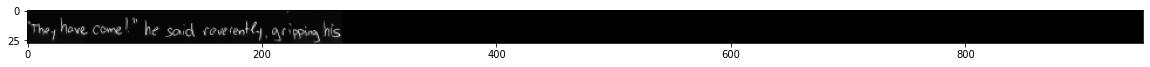

In [16]:
plt.figure(figsize=(20, 20))
plt.imshow(data.squeeze(0).numpy(), cmap='gray')

In [17]:
from text_recognizer.datasets.transforms import Compose, AddTokens

In [18]:
target_transform = Compose([torch.tensor, AddTokens(init_token="<sos>", pad_token="_", eos_token="<eos>")])

In [19]:
dataset = IamLinesDataset(train=True, init_token="<sos>", pad_token="_", eos_token="<eos>")
dataset.load_or_generate_data()
print(dataset)

IAM Lines Dataset
Number classes: 82
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_', 80: '<sos>', 81: '<eos>'}
Data: (7101, 28, 952)
Targets: (7101, 97)



In [342]:
data, target = dataset[181]
sentence = convert_y_label_to_string(target, dataset) 

([], [])

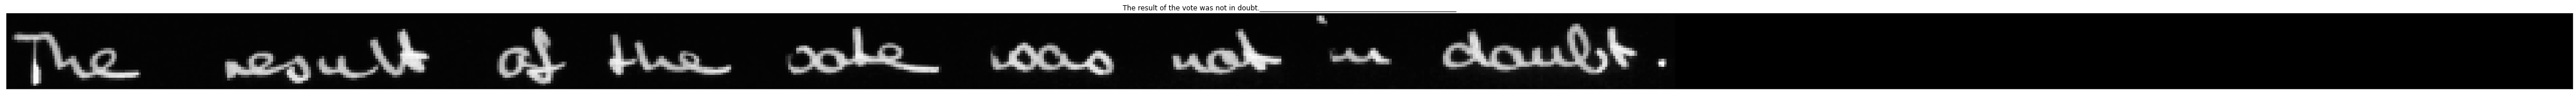

In [343]:
plt.figure(figsize=(80, 20))
plt.title(sentence)
plt.imshow(data.squeeze(0).numpy(), cmap='gray')
plt.xticks([])
plt.yticks([])

In [344]:
data.mean()

tensor(0.0631)

In [345]:
data.std()

tensor(0.1638)

In [346]:
from torchvision import transforms

In [347]:
n = transforms.Normalize((0.5,), (1.,))

In [390]:
ra = transforms.RandomAffine((-1.1, 1.1), scale=(0.5, 1))

In [399]:
d = ra(data)
d = (d > 0.15) * d
d = (d - d.mean()) / d.std()

([], [])

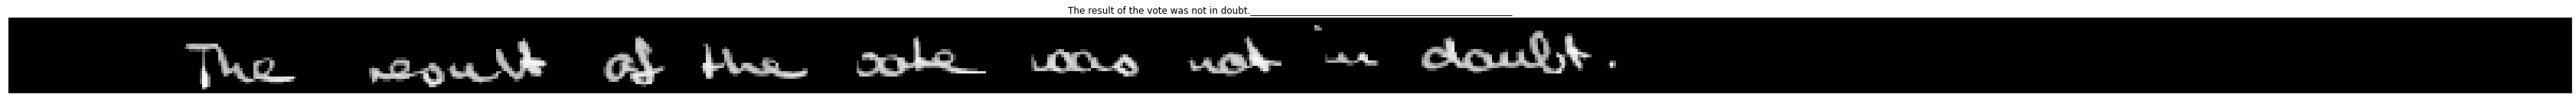

In [400]:
plt.figure(figsize=(60, 20))
plt.title(sentence)
plt.imshow(d.squeeze(0).numpy(), cmap='gray')
plt.xticks([])
plt.yticks([])

In [351]:
import torchvision

In [74]:
d  = torchvision.transforms.functional.gaussian_blur(d, 7, (0.75, 0.75))

([], [])

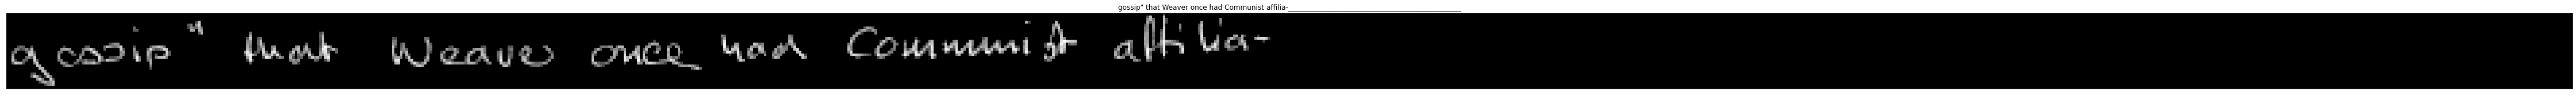

In [78]:
plt.figure(figsize=(80, 20))
plt.title(sentence)
plt.imshow(d.squeeze(0).numpy(), cmap='gray')
plt.xticks([])
plt.yticks([])